# Clustering de documents

## Imports

In [3]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [4]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
data_path = "../data/txt/"

## Choisir une décennie

In [6]:
DECADE = '1950'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [7]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [8]:
# Exemple de fichiers
files[:5]

['KB_JB421_1950-04-15_01-00004.txt',
 'KB_JB572_1950-06-07_01-00004.txt',
 'KB_JB773_1950-07-22_01-00010.txt',
 'KB_JB837_1950-12-01_01-00007.txt',
 'KB_JB838_1950-01-06_01-00002.txt']

In [9]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [10]:
# Exemple de textes
texts[0][:400]

"L'AVENIR DU LUXEMBOURG Samedi 15 avri j 350, \nMORHET \nSoirée dramatique \n1 Le cercle dramatique Sainte-Cécile \nde Morhet reprendra, ce dimanche 16 \navril ^Quasimodo), sa brillante soirée \nqui a remporté un succès si remarqua-\n| bie le 10 mars dernier. \ni Rappelons ie programme : \n; 1) ouverture : « Brabançonne »,par \n• la Fantare ; 2) « La .bohème », chœur \nà 2 voix exécuté par JV^.es Renée Cara, "

## Vectoriser les documents à l'aide de TF-IDF

In [11]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [12]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [13]:
tfidf_vectors = vectorizer.fit_transform(texts)

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
# Détail de la matrice
tfidf_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 704357 stored elements and shape (1004, 3491)>

### Imprimer le vecteur tf-IDF du premier document

In [15]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

s'est          0.202510
mlle           0.190575
foire          0.184380
roi            0.172903
avril          0.164637
                 ...   
él             0.000000
élections      0.000000
électr         0.000000
électricité    0.000000
éducation      0.000000
Length: 3491, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [16]:
cosine([1, 2, 3], [1, 2, 3])

np.float64(0.0)

In [17]:
cosine([1, 2, 3], [1, 2, 2])

np.float64(0.02004211298777725)

In [18]:
cosine([1, 2, 3], [2, 2, 2])

np.float64(0.07417990022744858)

### Tests sur nos documents

In [19]:
tfidf_array = tfidf_vectors.toarray()

In [20]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.03022702, 0.        , ..., 0.        , 0.        ,
       0.        ], shape=(3491,))

In [21]:
# Vecteur du document 1
tfidf_array[1]

array([0.       , 0.0157552, 0.       , ..., 0.       , 0.       ,
       0.       ], shape=(3491,))

In [22]:
cosine(tfidf_array[0], tfidf_array[1])

np.float64(0.7883657407543112)

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [23]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [24]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [25]:
clusters = km_model.fit_predict(tfidf_vectors)

In [26]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [27]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB421_1950-04-15_01-00004.txt',
               'KB_JB572_1950-06-07_01-00004.txt',
               'KB_JB837_1950-12-01_01-00007.txt',
               'KB_JB838_1950-01-06_01-00002.txt',
               'KB_JB838_1950-01-10_01-00006.txt',
               'KB_JB838_1950-02-13_01-00005.txt',
               'KB_JB838_1950-02-13_01-00008.txt',
               'KB_JB838_1950-02-15_01-00014.txt',
               'KB_JB838_1950-02-18_01-00009.txt',
               'KB_JB838_1950-02-25_01-00006.txt',
               'KB_JB838_1950-03-01_01-00005.txt',
               'KB_JB838_1950-03-05_01-00020.txt',
               'KB_JB838_1950-03-11_01-00005.txt',
               'KB_JB838_1950-03-19_01-00001.txt',
               'KB_JB838_1950-03-27_01-00002.txt',
               'KB_JB838_1950-03-29_01-00002.txt',
               'KB_JB838_1950-03-31_01-00006.txt',
               'KB_JB838_1950-04-19_01-00002.txt',
               'KB_JB838_1950-04-26_01-00007.txt',
               'KB_JB838_1950-0

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [28]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [29]:
reduced_vectors[:10]

array([[-0.27171117,  0.07652981],
       [-0.20463913,  0.00852012],
       [ 0.04084705, -0.19640051],
       [-0.17032487,  0.0227562 ],
       [-0.32535487,  0.11428677],
       [ 0.1147517 , -0.30373725],
       [ 0.44430418, -0.25189087],
       [-0.238258  , -0.03785647],
       [-0.05127705, -0.10503335],
       [ 0.61343177,  0.50428405]])

### Générer le plot

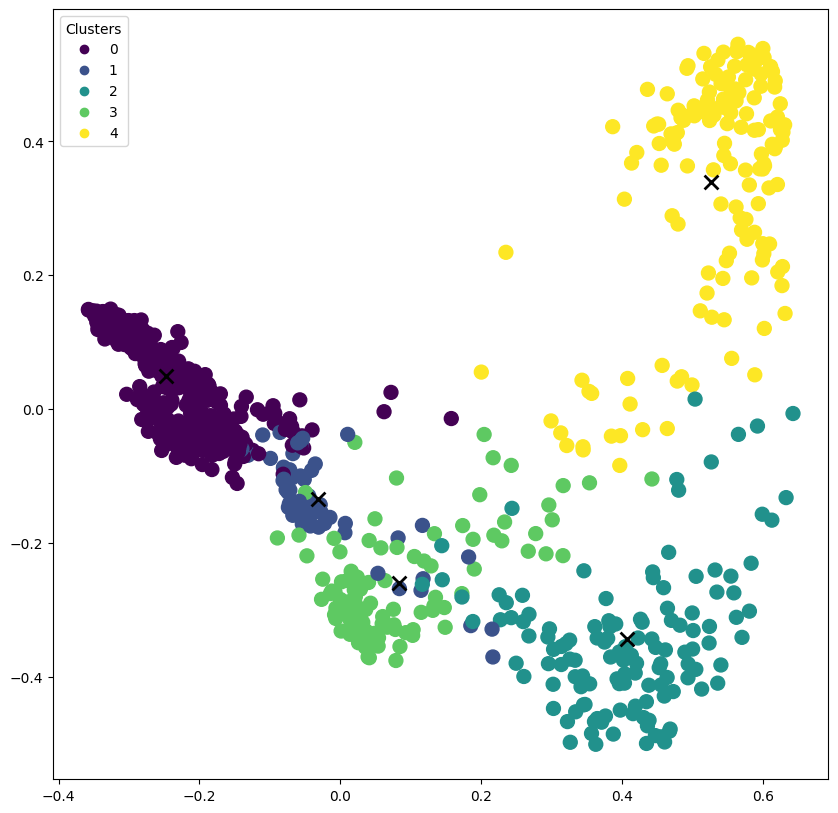

In [31]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")